In [68]:
scansdir = "/home/julian/repositories/Future-Hangglider/HGnotebooks/DXFaerofoilrescandata"
import os
dxfs = [ os.path.join(scansdir, f)  for f in sorted(os.listdir(scansdir))  if f[-4:] == ".dxf"]
dxfs

['/home/julian/repositories/Future-Hangglider/HGnotebooks/DXFaerofoilrescandata/#8.dxf',
 '/home/julian/repositories/Future-Hangglider/HGnotebooks/DXFaerofoilrescandata/0.dxf',
 '/home/julian/repositories/Future-Hangglider/HGnotebooks/DXFaerofoilrescandata/1.dxf',
 '/home/julian/repositories/Future-Hangglider/HGnotebooks/DXFaerofoilrescandata/2.dxf',
 '/home/julian/repositories/Future-Hangglider/HGnotebooks/DXFaerofoilrescandata/3.dxf',
 '/home/julian/repositories/Future-Hangglider/HGnotebooks/DXFaerofoilrescandata/4.dxf',
 '/home/julian/repositories/Future-Hangglider/HGnotebooks/DXFaerofoilrescandata/5.dxf',
 '/home/julian/repositories/Future-Hangglider/HGnotebooks/DXFaerofoilrescandata/6.dxf',
 '/home/julian/repositories/Future-Hangglider/HGnotebooks/DXFaerofoilrescandata/7.dxf',
 '/home/julian/repositories/Future-Hangglider/HGnotebooks/DXFaerofoilrescandata/8.dxf']

In [52]:
import ezdxf
ds = [ ezdxf.readfile(f)  for f in dxfs ]


In [62]:
import math, numpy
from matplotlib import pyplot as plt
%matplotlib inline

def pltd(d, c):
    ptsout = [ ]
    for e in d.entities:
        if e.dxftype() == "LINE":
            #print(e.dxf.start[0], e.dxf.start[1], e.dxf.end[0], e.dxf.end[1])
            plt.plot([e.dxf.start[0], e.dxf.end[0]], [e.dxf.start[1], e.dxf.end[1]], c=c)
            ptsout.append([e.dxf.start[0], e.dxf.start[1]])
            ptsout.append([e.dxf.end[0], e.dxf.end[1]])

        elif e.dxftype() == "SPLINE":
            ps = list(e.control_points)
            #print(len(ps), ps[0], ps[-1])
            plt.plot([p[0]  for p in ps], [p[1]  for p in ps], c=c)
            ptsout.extend([[p[0], p[1]]  for p in ps])
            
        elif e.dxftype() == "ARC":
            xs, ys = [ ], [ ]
            for a in numpy.linspace(e.dxf.start_angle, e.dxf.end_angle, 10):
                ax = e.dxf.center[0] + e.dxf.radius * math.cos(math.radians(a))
                ay = e.dxf.center[1] + e.dxf.radius * math.sin(math.radians(a))
                xs.append(ax)
                ys.append(ay)
                ptsout.append([ax, ay])
            plt.plot(xs, ys, c=c)
        else:
            print(e.dxftype())
    return ptsout

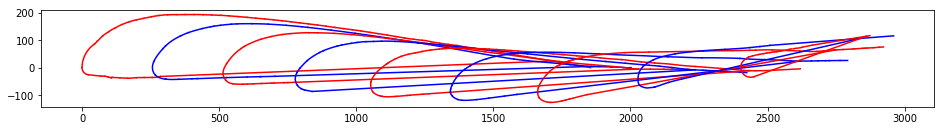

In [63]:
plt.figure(figsize=(16,5))
for i, d in enumerate(ds):
    pltd(d, "blue" if (i%2) else "red")
plt.gca().set_aspect('equal', adjustable='box')


/home/julian/repositories/Future-Hangglider/HGnotebooks/DXFaerofoilrescandata/8.dxf


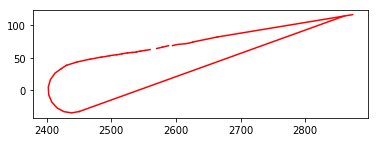

In [64]:
d = ds[-1]
pts = pltd(d, "blue" if (i%2) else "red")
plt.gca().set_aspect('equal', adjustable='box')
print(dxfs[-1])

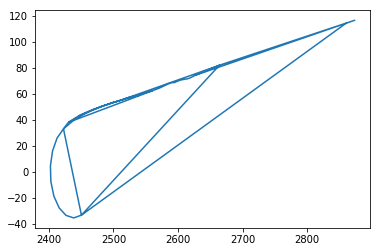

In [65]:
plt.plot([p[0]  for p in pts], [p[1]  for p in pts])

In [69]:
fout = open(os.path.join(scansdir, "0.csv"), "w")
for p in pts:
    fout.write("%f,%f\n" % (p[0], p[1]))
fout.close()


In [70]:
len(pts)

207